In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test import yolo_model

Using TensorFlow backend.


In [3]:
input_h, input_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45

In [4]:
model = yolo_model.make_yolov3_model()

In [6]:
weight_path = 'test/yolov3.weights'
weight_reader = yolo_model.WeightReader(weight_path) # load the model weights
weight_reader.load_weights(model)  # set the model weights into the model

loading weights of convolution #0
loading weights of convolution #1
loading weights of convolution #2
loading weights of convolution #3
no convolution #4
loading weights of convolution #5
loading weights of convolution #6
loading weights of convolution #7
no convolution #8
loading weights of convolution #9
loading weights of convolution #10
no convolution #11
loading weights of convolution #12
loading weights of convolution #13
loading weights of convolution #14
no convolution #15
loading weights of convolution #16
loading weights of convolution #17
no convolution #18
loading weights of convolution #19
loading weights of convolution #20
no convolution #21
loading weights of convolution #22
loading weights of convolution #23
no convolution #24
loading weights of convolution #25
loading weights of convolution #26
no convolution #27
loading weights of convolution #28
loading weights of convolution #29
no convolution #30
loading weights of convolution #31
loading weights of convolution #32

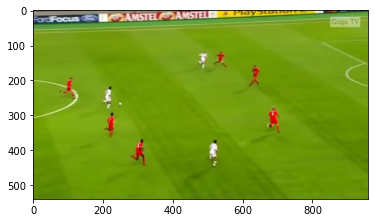

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_file = 'resources/frame0.jpg'
orig_image = cv2.imread(image_file)

plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))

In [77]:
orig_h, orig_w = orig_image.shape[0:2]
image = yolo_model.preprocess_input(orig_image, input_h, input_w)

In [78]:
y_pred = model.predict(image)

In [79]:
boxes = []
for i, y in enumerate(y_pred):
    # decode the output of the network
    boxes += yolo_model.decode_netout(y[0], yolo_model.anchors[i], obj_thresh, nms_thresh, input_h, input_w)

# non-maximal suppression
yolo_model.do_nms(boxes, nms_thresh)

# correct the sizes of the bounding boxes
yolo_model.correct_yolo_boxes(boxes, orig_h, orig_w, input_h, input_w)

In [91]:
# draw bounding boxes on the image using labels
detected_image = yolo_model.draw_boxes(orig_image, boxes, yolo_model.labels, obj_thresh) 

# write the image with bounding boxes to file
detected_image_file = 'test/frame0_detected.jpg'
cv2.imwrite(detected_image_file, detected_image.astype('uint8'))

person: 94.79771256446838%
person: 93.16078424453735%
person: 99.06469583511353%
person: 92.7547812461853%
person: 96.929931640625%
sports ball: 59.49850678443909%
person: 99.64313507080078%
person: 97.9532539844513%
person: 99.60941672325134%
person: 98.59451651573181%


True

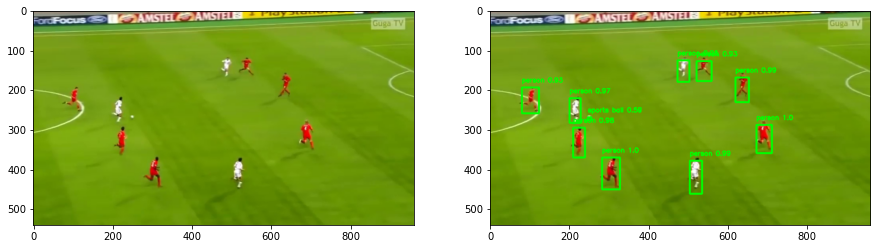

In [92]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))

In [80]:
import numpy as np
image = orig_image
boxes =  boxes
labels = yolo_model.labels
obj_thresh = obj_thresh
for box in boxes:
    label_str = ''
    label = -1

    for i in range(len(labels)):
        if box.classes[i] > obj_thresh:
            label_str += labels[i]
            label = i
            count = labels[i]
    
    if label >= 0 and count == 'sports ball':
            print('Soccer ball is at ('+str(np.mean([box.xmin,box.xmax])) + ', ' + str(np.mean([box.ymin,box.ymax]))+ ')')

Soccer ball is at (250.5, 272.5)


In [81]:
import numpy as np
image = orig_image
boxes =  boxes
labels = yolo_model.labels
obj_thresh = obj_thresh
for box in boxes:
    label_str = ''
    label = -1

    for i in range(len(labels)):
        if box.classes[i] > obj_thresh:
            label_str += labels[i]
            label = i
            count = labels[i]
    
    if label >= 0 and count != 'sports ball':
            print('Soccer players is at ('+str(np.mean([box.xmin,box.xmax])) + ', ' + str(np.mean([box.ymin,box.ymax]))+ ')')

Soccer players is at (487.0, 153.0)
Soccer players is at (539.0, 153.0)
Soccer players is at (635.0, 200.0)
Soccer players is at (101.5, 226.5)
Soccer players is at (214.0, 252.0)
Soccer players is at (690.5, 323.5)
Soccer players is at (224.0, 332.5)
Soccer players is at (304.5, 410.0)
Soccer players is at (518.5, 419.5)


In [82]:
import numpy as np
image = orig_image
boxes =  boxes
labels = yolo_model.labels
obj_thresh = obj_thresh

soccer_x = 0
soccer_y = 0

for box in boxes:
    label_str = ''
    label = -1

    for i in range(len(labels)):
        if box.classes[i] > obj_thresh:
            label_str += labels[i]
            label = i
            count = labels[i]
            
    if label >= 0 and count == 'sports ball':
            soccer_x = np.mean([box.xmin,box.xmax])
            soccer_y = np.mean([box.ymin,box.ymax])

In [87]:
player_xmin = 0
player_xmax = 0
player_ymin = 0
player_ymax = 0

distance_compare = 10000
distance = 0

for box in boxes:
    label_str = ''
    label = -1
    
    for i in range(len(labels)):
        if box.classes[i] > obj_thresh:
            label_str += labels[i]
            label = i
            count = labels[i]
    
    if label >= 0 and count != 'sports ball' and soccer_x != 0:
            distance = np.sqrt((np.mean([box.xmin,box.xmax])-soccer_x)**2+(np.mean([box.ymin,box.ymax])-soccer_y)**2)
            if distance < distance_compare:
                player_xmin = box.xmin
                player_xmax = box.xmax
                player_ymin = box.ymin
                player_ymax = box.ymax
                distance_compare = distance
                
if player_xmin != 0:
    print('The one most likely to shoot is ('+str(np.mean([player_xmin,player_xmax])) + ', ' + str(np.mean([player_ymin,player_ymin]))+ ')') 

The one most likely to shoot is (214.0, 221.0)


In [88]:
new_image = orig_image.copy()
new_image = cv2.rectangle(new_image, (player_xmin,player_ymin), (player_xmax,player_ymax), (0,255,0), 3)
new_image = cv2.putText(new_image, 
            'most likely to shoot', 
            (player_xmin, player_ymin - 13),
            cv2.FONT_HERSHEY_SIMPLEX, 
            1e-3 * image.shape[0], 
            (0,255,0), 2)

In [89]:
detected_image = new_image

# write the image with bounding boxes to file
detected_image_file = 'test/frame0_detected.jpg'
cv2.imwrite(detected_image_file, detected_image.astype('uint8'))

True

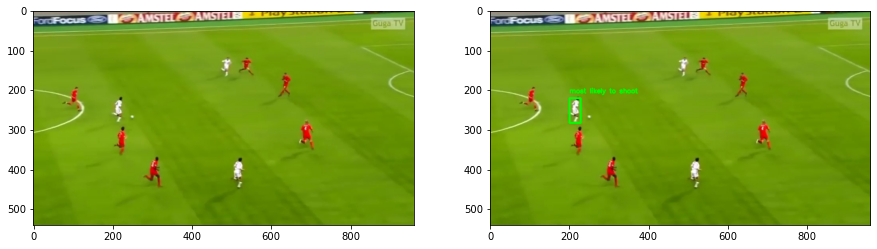

In [90]:
fig = plt.figure(figsize=(15,8))
fig.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
fig.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(detected_image, cv2.COLOR_BGR2RGB))